In [1]:
import pandas as pd
import numpy as np

import pymc3 as pm
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot
%matplotlib inline

In [2]:
df = pd.read_csv('../data/data3.csv')
df.head()

,x,y
0,2.875775,0.223825
1,7.883051,6.118438
2,4.089769,2.167730
3,8.830174,5.868317
4,9.404673,7.333365


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [tau, alpha]
Sampling 2 chains, 0 divergences: 100%|████████████████████████████████████████| 8000/8000 [00:10<00:00, 770.49draws/s]


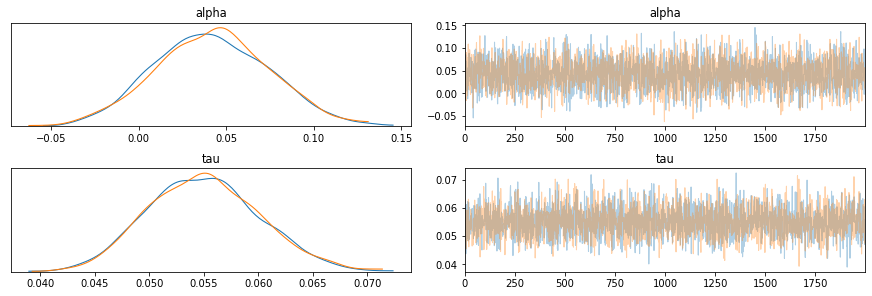

In [3]:
### edTest(test_pm_model) ###
np.random.seed(109)
with pm.Model() as model:
   #Set priors for unknown model parameters
   alpha = pm.Normal('alpha',mu=0,tau=1000)
   
   # Likelihood (sampling distribution) of observations
   tau_obs = pm.Gamma('tau', alpha=0.001, beta=0.001)
   #obs = pm.Normal(____________) #Parameters to set: name, mu, tau, observed
   obs = pm.Normal('obs', mu=alpha, tau=tau_obs, observed=df['y']) #Parameters to set: name, mu, tau, observed
   # create trace plots 
   trace = pm.sample(2000, tune=2000)
   pm.traceplot(trace, compact=False);


In [4]:
#posterior means
np.mean(trace['alpha']) , np.mean(trace['tau'])

(0.041578640873060575, 0.0549571507824306)